# Computer Vision - P3

## Delivery

Your overall grading will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented exhaustively and in **English**. 

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Answers to questions also need to be in **English**.

- Make sure to print and plot exactly what it is indicated. If a reference image is provided, your output is expected to be exactly the same unless instructed differently. 

- The deliverable of both parts must be a file named **P3_Student1_Student2.zip** that includes:
    - The notebook P3_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook (upload the ones that were not provided)
    
- It is required that your code can be run by us without need of any modification and without getting any errors.

- Use packages and solutions that were covered in your class and tutorials. If you are unsure about using a particular package, you should seek clarification from your instructor to confirm whether it is allowed.

- Please refrain from utilizing resources like ChatGPT to complete this lab assignment.

**Deadline (Campus Virtual): Group A & F: November 14th, 23:00 h; Group B: November 14th, 23:00 h** 

==============================================================================================
## Practicum 3: Image and Video Segmentation

==============================================================================================

The main topics of Laboratory 3 are:

3.1. Segmentation of video shots with static scenes.

3.2. Background subtraction.

3.3. Segmentation of images.

The following chapters of the book “Computer Vision: Algorithms and Applicatons” from Richard Szeliski have further information about the topic:

* Chapter 4: Computer Vision: Algorithms and Applications.

* Chapter 5: Segmentation.



In [39]:
# Example
import numpy as np
import skimage
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.segmentation import slic, mark_boundaries, felzenszwalb, quickshift
from skimage.transform import resize


## 3.1 Segmentation of images

Apply the image segmentation methods (Felzenswhalbs, Slic and Quickshift) based on the clustering of points corresponding to the pixels but in the feature space RGB-XY space.

**Hint**: 
- Different image segmentation commands can be found in skimage.segmentation.
- Use the function segmentation.mark_boundaries for seeing the boundaries of the segments.
- Use the inline pluggin to visualize images (%matplotlib inline).

<img src="images_notebook/image_Segmentation.png" width=600>

### Felzenszwalb's efficient graph based segmentation

a) Read 'barcelona.jpeg' image from the folder 'images' and segment it using the Felzenszwalbs's method. Comment the result.

In [31]:
img = skimage.io.imread('images_notebook/barcelona.jpeg')
segments_fz = skimage.segmentation.felzenszwalb(img, scale=100, sigma=0.5, min_size=50)
skimage.io.imshow(skimage.segmentation.mark_boundaries(img, segments_fz))
plt.show()

# comment the result from felzenszwalb segmentation method


NameError: name 'felzenszwalb' is not defined

b) Create a function where you explore at least 3 different parameter combinations in order to obtain a better image segmentation. Your function should receive the image and the set of parameters you would like to change. It should also resize your image to be a third part of the original image size. Your function results should be a visualization of the results and a print of the number of segments.  


Answer the following questions:
- Is it critical to convert the image in grayscale in order to do the image segmentation?

    For segmentation using Felzenszwalb's method, it is not necessary to convert the image to grayscale. The method uses the RGB values of the image to segment it.

- Is it critical to convert the image in float in order to do the image segmentation?

    It is important to convert the image to float in order to achieve a better segmentation. If the image is not converted to float, the segmentation will be done using the integer values of the image, which will result in a segmentation less accurate.

- Which are the optimal values according to your subjective perception?

    The optimal values according to my subjective perception are scale = 200, sigma = 0.5 and min_size = 10.

- How does each parameter behave?

    Scale: Controls the coarseness of the segmentation. Higher means larger clusters.
    
    Sigma: Controls the width of the Gaussian kernel used for smoothing the image. Higher means more weight to pixels farther away.

    Minimum Size: Specifies the minimum component size. Enforced using postprocessing. 

- Does the image reduction affect the optimal values? 

    Yes, the image reduction affects the optimal values. When resizing the image to a smaller size, the optimal values for parameters scale and sigma are smaller. The optimal value for parameter min_size is not affected by the image reduction.

C:\Users\rpgma\AppData\Local\Temp\ipykernel_11592\2260896441.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(params)+1, 1)


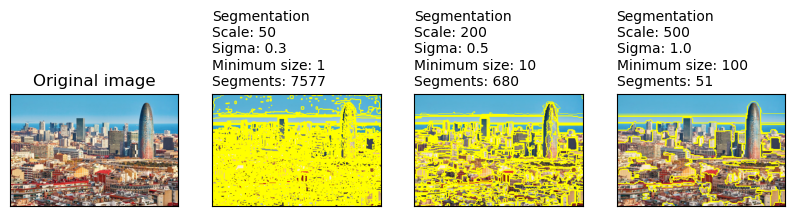

In [32]:

# Create a function where you explore at least 3 different parameter combinations in order to obtain a better image segmentation. Your function should receive the image and the set of parameters you would like to change. It should also resize your image to be a third part of the original image size. Your function results should be a visualization of the results and a print of the number of segments.

import matplotlib.pyplot as plt

def explore_segmentation(image, params):
    
    # Resize image to be a third part of the original size
    image_resized = skimage.transform.resize(image, (image.shape[0]//3, image.shape[1]//3), anti_aliasing=True)
    
    # Print original image and number of segments
    plt.figure(figsize=(10,10))
    plt.axis('off')
    plt.subplot(1, len(params)+1, 1)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.title("Original image")
    
    for i, parameters in enumerate(params, start=1):
        segments = skimage.segmentation.felzenszwalb(image_resized, **parameters)
        n_segments = len(np.unique(segments))
        
        img_segm = skimage.segmentation.mark_boundaries(image_resized, segments)

        plt.subplot(1, len(params) + 1, i + 1)
        plt.imshow(img_segm)
        plt.xticks([])
        plt.yticks([])
        plt.title('Segmentation\n'
                  f'Scale: {parameters["scale"]}\n'
                  f'Sigma: {parameters["sigma"]}\n'
                  f'Minimum size: {parameters["min_size"]}\n'
                  f'Segments: {n_segments}', loc='left', fontsize=10)
    
    plt.show()

explore_segmentation(img, [{'scale': 50, 'sigma': 0.3, 'min_size': 1}, {'scale': 200, 'sigma': 0.5, 'min_size': 10}, {'scale': 500, 'sigma': 1.0, 'min_size': 100}] )


c) Comment the definition of the algorithm (use approximately 3 lines at most), its advantages and disadvantages.

In [23]:
# Felzenszwalb segmentation is a bottom-up segmentation algorithm. It starts with each pixel 
# in its own segment and then merges segments based on a similarity criterion. The similarity 
# criterion is based on the difference of the mean color of the segments and the difference 
# of the mean position of the segments. The algorithm is fast and efficient, but it is not 
# very accurate.

# The advantages are:

# - It is fast and efficient.
# - It is easy to implement.
# - It is adaptative.

# The disadvantages are:

# - It is not very accurate.
# - It is not very robust to noise.
# - It is not very robust to illumination changes.


### SLIC - K-Means based image segmentation
d) Segment the same image using the SLIC image segmentation algorithm using the parameters by default. 

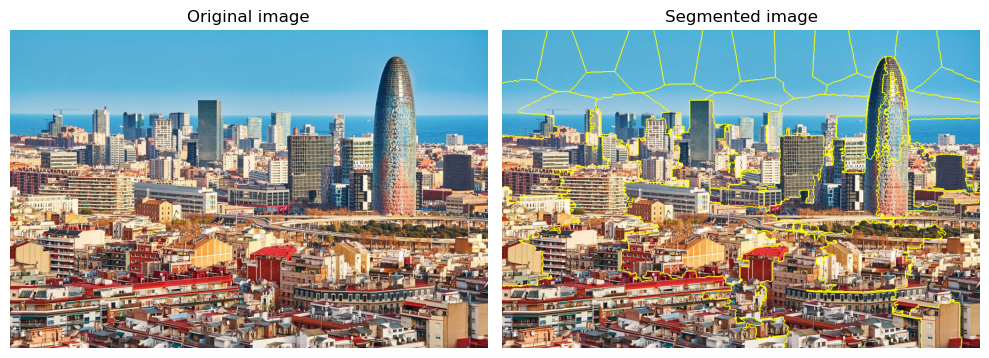

In [33]:
img = skimage.io.imread('images_notebook/barcelona.jpeg')
segments_slic = slic(img, n_segments=100, compactness=10, sigma=1)  

#plot the original image and the segmented image in the same plot with titles
fig, ax = plt.subplots(1, 2, figsize=(10, 10), sharex=True, sharey=True)
ax[0].imshow(img)
ax[0].set_title('Original image')
ax[1].imshow(mark_boundaries(img, segments_slic))
ax[1].set_title('Segmented image')
for a in ax.ravel():
    a.set_axis_off()
plt.tight_layout()
plt.show()


Create a function where you explore at least 3 different parameter combinations in order to obtain a better image segmentation. Your function should receive the image and the set of parameters you would like to change. It should also resize your image to be a third part of the original image size. Your function results should be a visualization of the results and a print of the number of segments.  


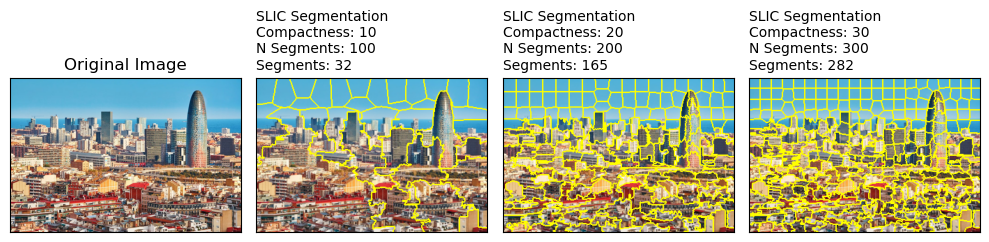

In [29]:
# Your solution here
def explore_slic_segmentation(image, params):
    # Resize the image to a third of the original size
    img_resized = resize(image, (image.shape[0] // 3, image.shape[1] // 3), anti_aliasing=True)

    # Original image and number of segments
    plt.figure(figsize=(10, 5))
    plt.subplot(1, len(params) + 1, 1)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.title('Original Image')

    for i, parameters in enumerate(params, start=1):
        # Perform SLIC segmentation with the given parameters
        segments = slic(img_resized, **parameters)
        num_segments = len(np.unique(segments))

        # Segmented image
        img_slic = mark_boundaries(img_resized, segments)

        # Display
        plt.subplot(1, len(params) + 1, i + 1)
        plt.imshow(img_slic)
        plt.xticks([])
        plt.yticks([])
        plt.title('SLIC Segmentation\n'
                  f'Compactness: {parameters["compactness"]}\n'
                  f'N Segments: {parameters["n_segments"]}\n'
                  f'Segments: {num_segments}', loc='left', fontsize=10)

    plt.tight_layout()
    plt.show()

# Explore SLIC segmentation with different parameters
explore_slic_segmentation(img, [{'compactness': 10, 'n_segments': 100}, {'compactness': 20, 'n_segments': 200}, {'compactness': 30, 'n_segments': 300}
])


f) Comment what the algorithm is (in up to 3 lines).

In [7]:
# SLIC is a superpixel-based segmentation algorithm that partitions the image 
#into compact and uniform regions. It is fast, efficient, and very accurate.

### Quickshift image segmentation

g) Segment the original image using the Quickshift algorithm. 

Create a loop where you explore kernel_size variations in order to obtain a better image segmentation. Argument why a higher or lower value improves the segmentation results. 


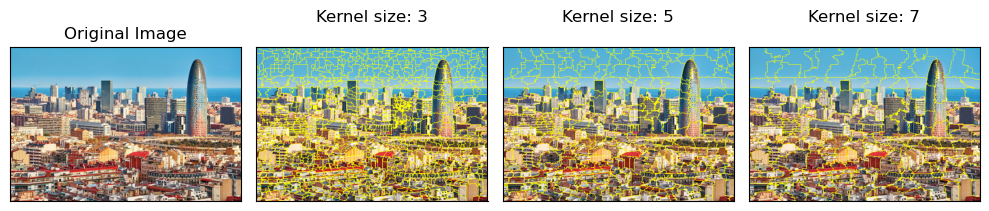

In [37]:
kernel_sizes = [3, 5, 7]

plt.figure(figsize=(10, 10))
plt.subplot(1, len(kernel_sizes) + 1, 1)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.title('Original Image')

for i, kernel_size in enumerate(kernel_sizes, start=1):
    segm_quickshift = quickshift(img, kernel_size=kernel_size, max_dist=100, ratio=0.2)
    img_quickshift = mark_boundaries(img, segm_quickshift)

    plt.subplot(1, len(kernel_sizes) + 1, i + 1)
    plt.imshow(img_quickshift)
    plt.xticks([])
    plt.yticks([])
    plt.title(f'Kernel size: {kernel_size}\n')
plt.tight_layout()
plt.show()

h) Comment what the algorithm is (in up to 3 lines).

In [9]:
# Quickshift is a hierarchical image segmentation algorithm that uses kernel density estimation to group pixels into regions
# of similar color and texture. It is fast and efficient, and can be used for a wide range of image segmentation tasks.


### Comparison of segmentation algorithms

Apply the best set of parameters of each algorithm and apply it to: 
1) Original image
1) Salt and pepper noise version of this image
2) Flipped image (horizontally)
3) Canny edge detector result of this image. 

Plot the image and its results of fezenswalb and SLIC algorithm in a 1x3 subplots. 

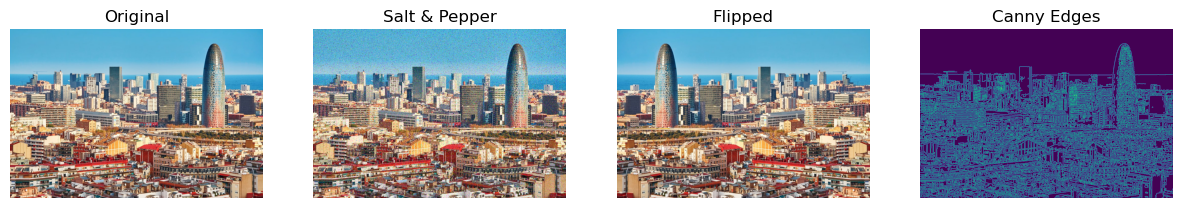

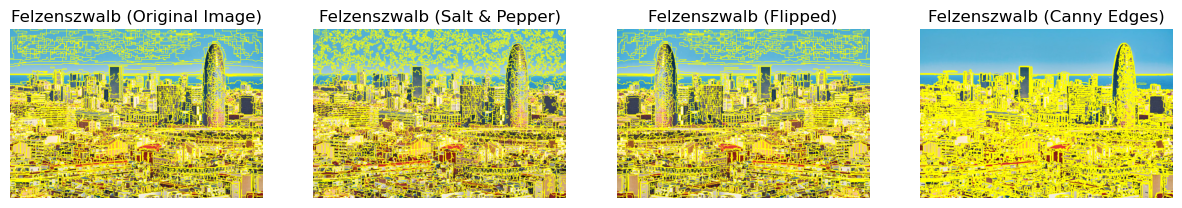

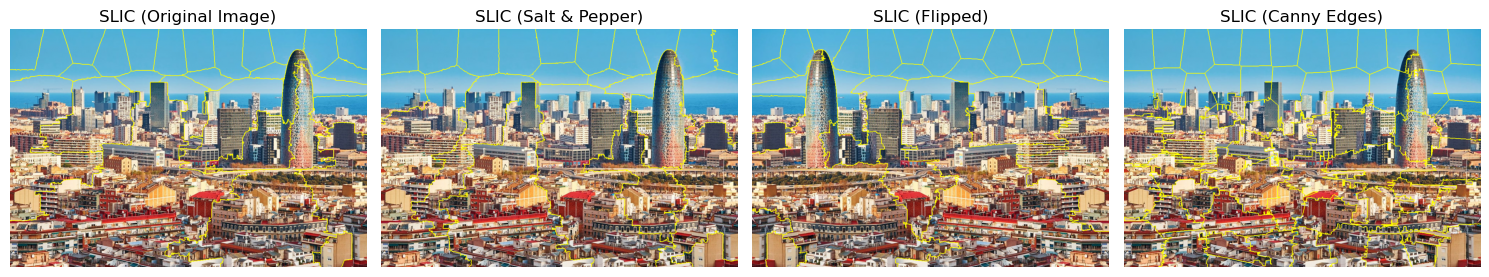

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_ubyte, segmentation, color, util, feature

# Load the original image
image = io.imread('images_notebook/barcelona.jpeg')

# Add salt and pepper noise to the image
image_sp = util.random_noise(image, mode='s&p', amount=0.05)

# Flip the image horizontally
image_flipped = np.fliplr(image)

# Apply Canny edge detector to the image
gry_image = color.rgb2gray(image)
edges = feature.canny(gry_image)

# Apply segmentation algorithms to different versions of the image
segmented_original_felzenszwalb = segmentation.felzenszwalb(image, scale=100, sigma=0.5, min_size=50)
segmented_sp_felzenszwalb = segmentation.felzenszwalb(image_sp, scale=100, sigma=0.5, min_size=50)
segmented_flipped_felzenszwalb = segmentation.felzenszwalb(image_flipped, scale=100, sigma=0.5, min_size=50)
segmented_canny_felzenszwalb = segmentation.felzenszwalb(edges, scale=100, sigma=0.5, min_size=50)

segmented_original_slic = segmentation.slic(image, n_segments=100, compactness=10)
segmented_sp_slic = segmentation.slic(image_sp, n_segments=100, compactness=10)
segmented_flipped_slic = segmentation.slic(image_flipped, n_segments=100, compactness=10)
segmented_canny_slic = segmentation.slic(color.gray2rgb(edges), n_segments=100, compactness=10)
# Plot the segmented images
plt.figure(figsize=(15, 5))

# Filters
plt.subplot(1, 4, 1)
plt.imshow(image)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(image_sp)
plt.title('Salt & Pepper')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(image_flipped)
plt.title('Flipped')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(edges)
plt.title('Canny Edges')
plt.axis('off')

# Plot the segmented images
plt.figure(figsize=(15, 5))

# Felzenszwalb Segmentation
plt.subplot(1, 4, 1)
plt.imshow(mark_boundaries(image, segmented_original_felzenszwalb))
plt.title('Felzenszwalb (Original Image)')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(mark_boundaries(image,segmented_sp_felzenszwalb))
plt.title('Felzenszwalb (Salt & Pepper)')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(mark_boundaries(image_flipped,segmented_flipped_felzenszwalb))
plt.title('Felzenszwalb (Flipped)')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(mark_boundaries(image,segmented_canny_felzenszwalb))
plt.title('Felzenszwalb (Canny Edges)')
plt.axis('off')

# Plot the segmented images
plt.figure(figsize=(15, 5))

# SLIC Segmentation
plt.subplot(1, 4, 1)
plt.imshow(mark_boundaries(image,segmented_original_slic))
plt.title('SLIC (Original Image)')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(mark_boundaries(image,segmented_sp_slic))
plt.title('SLIC (Salt & Pepper)')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(mark_boundaries(image_flipped,segmented_flipped_slic))
plt.title('SLIC (Flipped)')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(mark_boundaries(image,segmented_canny_slic))
plt.title('SLIC (Canny Edges)')
plt.axis('off')

plt.tight_layout()
plt.show()

- Do the transformations affect the segmentation? Why or why not? 
- Can the number of segments can be used as a criterion for the performance of the algorithms?

## 3.2 Segmentation via clustering

In this exercise, you will implement hierarchical clustering to segment the "images_notebook/loro.png" image in gray scales. First load and visualize the image, then implement hierarchical clustering over the pixels and plot the final results side by side to the original image

Hint: Sklearn has a hierarchical clustering implementation you should use. Reshape your dataset such that you have a 2 dimensional array. Use linkage "ward" and grid_to_graph function for the connectivity parameter. 

<img src="images_notebook/loro_segmentation.jpg" width=600>

In [11]:
# Your solution here

## Video segmentation

Given the video stored in ‘Barcelona-sequence’, which contains images acquired by a static camera, we ask you to:
- Find the temporal segments of the video (shots). Where the scene change? (Section 3.1)
- Extract the background images and thus, remove all the "artifacts" considered as foreground related to movement. (Section 3.2)




<img src="images_notebook/screenshot.png" width=600>

## 3.3 Segmentation of video shots

Read and visualize the sequence of images "images_notebook/Barcelona-sequence".

**Hint:** In order to read a collection of images, we wil use the function [animation.FuncAnimation](https://matplotlib.org/2.0.0/api/_as_gen/matplotlib.animation.FuncAnimation.html). Observe in the following Example, how FuncAnimation is used to read and visualize a sequence of frames. Explore the parameters of animation.FuncAnimation().

In [12]:
# Your solution here

a) Find where a shot (scene) finishes and the following starts (the shot boundaries). To achieve this goal, we are going to compute the difference between the histograms of consecutive frames. The proposed solution required:

- Compute the histogram for each RGB channel

- The 'total' histogram of the image is computed as the sum of the three histograms

- Compute the mean of the difference (in absolute value) between the histograms of two consecutive frames

Those differences with largest values corresponds to the transitions between shots. 

Therefore, **we need to create a funtion which return an array with the differences between histograms. We will plot the resulting array in order to localice the maximum values as well as a suitable threshold to define localize the transitions.**

<img src="images_notebook/histogramshot.png" width=600>
<img src="images_notebook/difference_histograms.png">

To solve this exercise, you need to create a **temporal plot** showing a frame by frame difference measure to be defined by you, being applicable to distinguish the shots. Define a criterion to detect the boundaries of the shots and visualize it in a static plot.

The plot above was obtain by using 64 bins histogram and the measure as mean of absolute difference. 

In [13]:
# Your solution here

b) Additionally, create an interactive plot executing the following code in "Example A". Substitute the bottom plot with the temporal plot showing the differences between the consecutive frames. 

In [14]:
# Example A
def data_gen():
    return enumerate(mean_differences)


In [15]:
# Your solution here

c) Show the initial and final images of each shot extracted as follows:

<img src="images_notebook/result_shot_detection.png">


Use the previous plot to define the proper threshold value over the differences of histograms. Use the threshold to localize indexes of the array returned by the function proposed in the previous question and, therefore, localize the initial and final frames for each shot as shown in the reference image


In [16]:
# Your solution here

d) Which measure have you used in order to visually distinguish the shots in a plot? Explain your solution.

In [17]:
# Your solution here


e) Would your video segmentation strategy be able to separate and track objects? Argue your answer.

In [18]:
# Your solution here


f) Would your video segmentation strategy be able to capture continuous transition? Argue your answer.

In [19]:
# Your solution here


## 3.4 Background subtraction

Apply the background subtraction algorithm (check theory material).

<img src="images_notebook/screenshot2.png" width=500>

a) Visualize the following images for each different scene of the video:

    1) an image belonging to the shot
    2) the background image, and
    3) the foreground.
    
**Hint**: You can construct a mask obtained from the original image and the background in order to know which parts of the image form part from the foreground and recover from the original image just the foreground regions.

In [20]:
# Your solution here

b) What do the static background images represent? 

In [21]:
# Your solution here

c) What happens if the shots are not correctly extracted? And, what happens if you find too many shots in the video? 

In [22]:
# Your solution here

d) What happens if you subtract the background image from the original one?

In [23]:
# Your solution here

e) In which situations does the algorithm work and in which it does not? Do you see any additional application for this algorithm?

In [24]:
# Your solution here

f) Visualize the highest and lowest similarity frame with respect to the foreground images of each scene. You can use the metric of your like, explain why you picked it. 

In [25]:
# Your solution here
